In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import pandas as pd

In [2]:
df = pd.read_csv("../Datos tratados/Datos_con_ECFP.csv")

In [3]:
df.head()

,SMILES,BBB+/BBB-,group,MorganFP,0,1,2,3,4,5,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,BBB-,A,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,BBB-,A,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Oc1c(I)cc(Cl)c2cccnc12,BBB-,A,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CCNC(=NCCSCc1ncccc1Br)NC#N,BBB-,A,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,BBB-,A,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y = df["BBB+/BBB-"]

In [14]:
X = df.drop(columns=["SMILES", "BBB+/BBB-", "group", "MorganFP"])

In [7]:
X

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
tupla = (5,8)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
pipe = Pipeline([
    ('pca', PCA()),
    ('GB', GradientBoostingClassifier())
])

In [24]:
param_grid = {
    'pca__n_components': [314],  # Ejemplo de opciones para el número de componentes en PCA
    'GB__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'GB__max_depth': [3, 4, 5, 6],
    'GB__max_features': ['sqrt', 'log2']
}

In [25]:
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

In [26]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END GB__learning_rate=0.01, GB__max_depth=3, GB__max_features=sqrt, pca__n_components=314; total time=   4.4s
[CV] END GB__learning_rate=0.01, GB__max_depth=3, GB__max_features=sqrt, pca__n_components=314; total time=   4.2s
[CV] END GB__learning_rate=0.01, GB__max_depth=3, GB__max_features=sqrt, pca__n_components=314; total time=   4.2s
[CV] END GB__learning_rate=0.01, GB__max_depth=3, GB__max_features=sqrt, pca__n_components=314; total time=   4.3s
[CV] END GB__learning_rate=0.01, GB__max_depth=3, GB__max_features=sqrt, pca__n_components=314; total time=   4.2s
[CV] END GB__learning_rate=0.01, GB__max_depth=3, GB__max_features=log2, pca__n_components=314; total time=   2.5s
[CV] END GB__learning_rate=0.01, GB__max_depth=3, GB__max_features=log2, pca__n_components=314; total time=   2.5s
[CV] END GB__learning_rate=0.01, GB__max_depth=3, GB__max_features=log2, pca__n_components=314; total time=   2.5s
[CV] END GB__learn

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('GB', GradientBoostingClassifier())]),
             param_grid={'GB__learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'GB__max_depth': [3, 4, 5, 6],
                         'GB__max_features': ['sqrt', 'log2'],
                         'pca__n_components': [314]},
             scoring='accuracy', verbose=2)

In [27]:
grid_search.best_params_

{'GB__learning_rate': 0.3,
 'GB__max_depth': 5,
 'GB__max_features': 'log2',
 'pca__n_components': 314}

In [28]:
grid_search.best_score_

0.8611689351481185

# Entrenamiento con los datos de prueba
<hr>

In [29]:
pipe = Pipeline([
    ('pca', PCA(n_components=314)),
    ('svc', GradientBoostingClassifier(learning_rate=0.3, max_depth=5, max_features='log2'))
])

In [30]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=314)),
                ('svc',
                 GradientBoostingClassifier(learning_rate=0.3, max_depth=5,
                                            max_features='log2'))])

# Resultados del modelo
<hr>

In [31]:
y_predicha = pipe.predict(X_test)

In [32]:
#Calcular estadísticos
accuracy = accuracy_score(y_test, y_predicha)
recall = recall_score(y_test, y_predicha, average='weighted')
precision = precision_score(y_test, y_predicha, average='weighted')
f1 = f1_score(y_test, y_predicha, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.85
Recall 0.85
precision 0.849
f1 0.847


In [33]:
y_entrenamiento = pipe.predict(X_train)

In [34]:
accuracy = accuracy_score(y_train, y_entrenamiento)
recall = recall_score(y_train, y_entrenamiento, average='weighted')
precision = precision_score(y_entrenamiento, y_entrenamiento, average='weighted')
f1 = f1_score(y_train, y_entrenamiento, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.977
Recall 0.977
precision 1.0
f1 0.977


# Confusion Matrix
<hr>

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [36]:
mat = confusion_matrix(y_predicha, y_test)

<Axes: >

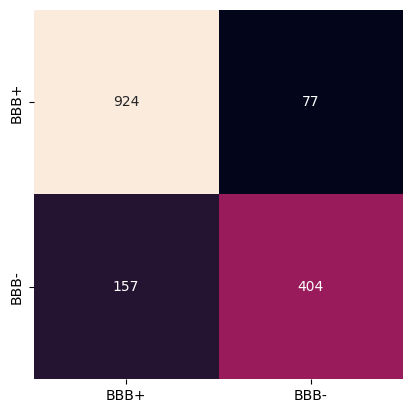

In [37]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar = False, xticklabels=df["BBB+/BBB-"].value_counts().index, yticklabels=df["BBB+/BBB-"].value_counts().index)

# Guardar modelo
<hr>

In [38]:
import joblib

In [39]:
joblib.dump(pipe, '../Guardado de modelos/modelo_GB.joblib')

['../Guardado de modelos/modelo_GB.joblib']